<a href="https://colab.research.google.com/github/kriveramarcos/Labquimica/blob/main/Kevin_Rivera_Marcos__4_diedros_pySCF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **DIEDROS_PYSCF**
## **ALUNNO: KEVIN RIVERA MARCOS**
## **CÓDIGO: 23200299**




In [ ]:
#Primero intalamos los paquetes de RDKit
! pip install rdkit
! pip install pyscf

In [4]:
# Instalamos las liberías de RDkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

In [ ]:
#PARTE 1 : CÁLCULO DE ENERGÍA DEL CIS (REACTIVO)

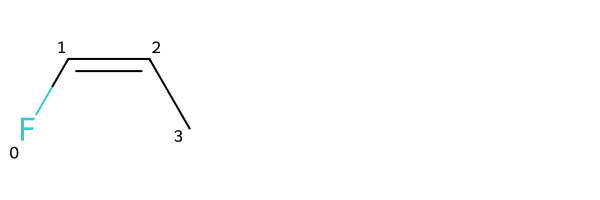

In [12]:
#Visualizaremos la estructura del "Cis" en base al co¿ódigo smiles proporcionado
smiles = "F\C=C/C"

#Convertir a molécula RDKit
mol_cis = Chem.MolFromSmiles(smiles)

#Se dinuja la estrcutura en 2D
Draw.MolsToGridImage([mol_cis])

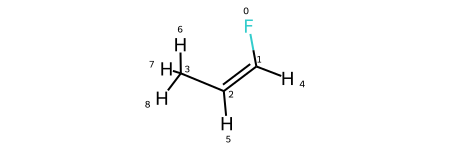

In [13]:
#Se crea la estructura 3D del Cis
smiles = "F\C=C/C"
mol_cis = Chem.MolFromSmiles(smiles)
mol_cis = Chem.AddHs(mol_cis)
Chem.AllChem.EmbedMolecule(mol_cis,useRandomCoords=False, randomSeed = 0)
#"useRandomCoords=False, randomSeed = 0" nos sirve para que el valor de cat se
# mantenga siempre igual
#Chem.MolToXYZFile(mol, "Cis.xyz")
mol_cis

In [14]:
# Guardamos la molécula en el formato .xyz
Chem.MolToXYZFile(mol_cis,"cis_KRM.xyz")

In [15]:
cat cis_KRM.xyz

9

F      1.098214    1.560041    0.370266
C      1.338691    0.259661    0.064198
C      0.289688   -0.533197   -0.128255
C     -1.094549    0.038552    0.000072
H      2.345815   -0.125201   -0.021813
H      0.387270   -1.581715   -0.375521
H     -1.107893    0.961223    0.597892
H     -1.554987    0.182709   -1.002230
H     -1.702249   -0.762072    0.495392


In [10]:
#Importamos el paquete pyscf para calcular el valor de energía
from pyscf import gto, scf

In [16]:
#Importamos el archivo .xyz creado en PSI4
mol_cis = gto.M(atom="cis_KRM.xyz")

In [19]:
#El valor de "3-21G" nos permite calcular el valor de una manera más práctica
#como un cuchillo de pan
mol_cis.basis = "3-21G"

# set the functional
mf_cis = mol_cis.KS()
mf_cis.xc = 'b3lyp'

In [20]:
#Ejecutanos el cálculo para obtener la energía total del Cis
mf_cis.kernel()

converged SCF energy = -214.252548921211


-214.25254892121052

In [33]:
#Finalmente el valor obtenido de energía del reactivo cis será
energia_cis= -214.252548921211
print("*** PRIMERA PARTE: CÁLCULO DE ENERGÍA DEL REACTIVO CIS ***")
print("\nEl valor de energía del reactivo (cis) es:",energia_cis)

*** PRIMERA PARTE: CÁLCULO DE ENERGÍA DEL REACTIVO CIS ***

El valor de energía del reactivo (cis) es: -214.252548921211


In [ ]:
#PARTE 2 : CÁLCULO DEL ESTADO DE ACTIVACIÓN CON CIS ROTADO 90°

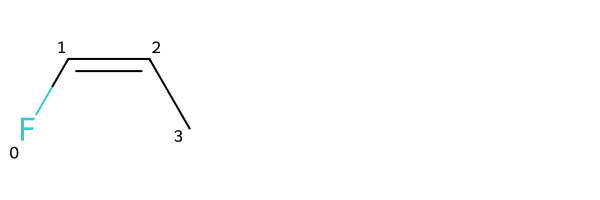

In [23]:
#Visualizaremos la estructura del "Cis" en base al código smiles proporcionado
smiles = "F\C=C/C"

#Convertir a molécula RDKit
mol_cis_90 = Chem.MolFromSmiles(smiles)

#Se dinuja la estrcutura en 2D
Draw.MolsToGridImage([mol_cis_90])

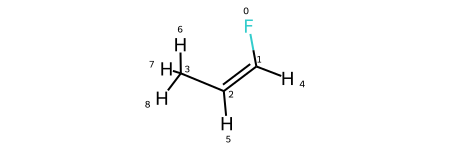

In [24]:
#Se crea la estrctura 3D del Cis para posteriormente rotarlo 90°
smiles = "F\C=C/C"
mol_cis_90 = Chem.MolFromSmiles(smiles)
mol_cis_90 = Chem.AddHs(mol_cis_90)
Chem.AllChem.EmbedMolecule(mol_cis_90,useRandomCoords=False, randomSeed = 0)
#"useRandomCoords=False, randomSeed = 0" nos sirve para que el valor de cat se
# mantenga siempre igual
#Chem.MolToXYZFile(mol, "Cis.xyz")
mol_cis_90

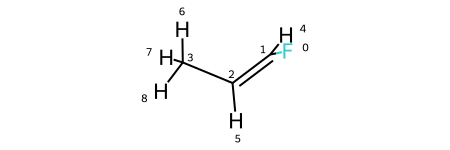

In [28]:
#Establecemos el valor en 90 para el conformador del cis usando lo puntos
#3,2,1 y 0 para rotarlo como si fuera una hoja de papel doblado en 2

Chem.AllChem.SetDihedralDeg(mol_cis_90.GetConformer(0),3,2,1,0,90.0)

# Guardamos la molécula en el formato .xyz
Chem.MolToXYZFile(mol_cis_90,"mol_cis_90_KRM.xyz")

# Mostramos la figura rotada 90°
mol_cis_90

In [29]:
cat mol_cis_90_KRM.xyz

9

F      1.830527    0.359296    1.325414
C      1.338691    0.259661    0.064198
C      0.289688   -0.533197   -0.128255
C     -1.094549    0.038552    0.000072
H      1.779554    0.803276   -0.760384
H      0.387270   -1.581715   -0.375521
H     -1.107893    0.961223    0.597892
H     -1.554987    0.182709   -1.002230
H     -1.702249   -0.762072    0.495392


In [30]:
#Importamos el archivo .xyz creado en PSI4
mol_cis_90 = gto.M(atom="mol_cis_90_KRM.xyz")

In [31]:
#El valor de "3-21G" nos permite calcular el valor de una manera más práctica
#como un cuchillo de pan
mol_cis_90.basis = "3-21G"

# set the functional
mf_cis_90 = mol_cis_90.KS()
mf_cis_90.xc = 'b3lyp'

In [32]:
#Ejecutanos el cálculo para obtener el estado de activación
mf_cis_90.kernel()

converged SCF energy = -214.083985929233


-214.08398592923265

In [72]:
#Finalmente el valor obtenido de energía del cis rotado 90° será
energia_cis_90= -214.083985929233
print("*** SEGUNDA PARTE: CÁLCULO DEL ESTADO DE ACTIVACIÓN ***")
print("\nEl valor del estado de activación es:",energia_cis_90)

*** SEGUNDA PARTE: CÁLCULO DEL ESTADO DE ACTIVACIÓN ***

El valor del estado de activación es: -214.083985929233


In [ ]:
#PARTE 3 : CÁLCULO DE ENERGÍA EN EL PRODCUTO - TRANS

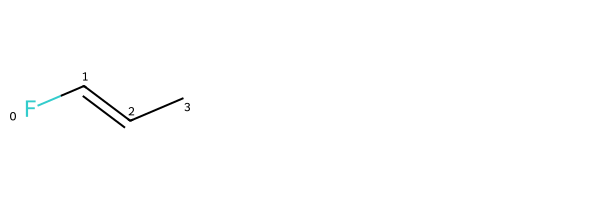

In [35]:
#Visualizaremos la estructura del "Trans" en base al código smiles proporcionado
smiles = "F/C=C/C"

#Convertir a molécula RDKit
mol_trans = Chem.MolFromSmiles(smiles)

#Se dibuja la estrucutura en 2D
Draw.MolsToGridImage([mol_trans])

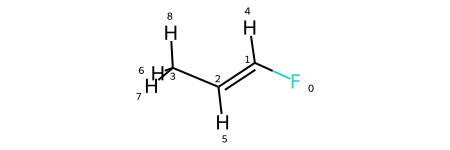

In [36]:
#Se crea la estrctura 3D del Trans para posteriormente rotarlo 90°
smiles = "F/C=C/C"
mol_trans = Chem.MolFromSmiles(smiles)
mol_trans = Chem.AddHs(mol_trans)
Chem.AllChem.EmbedMolecule(mol_trans,useRandomCoords=False, randomSeed = 0)
#"useRandomCoords=False, randomSeed = 0" nos sirve para que el valor de cat se
# mantenga siempre igual
#Chem.MolToXYZFile(mol, "Cis.xyz")
mol_trans

In [37]:
# Guardamos la molécula en el formato .xyz
Chem.MolToXYZFile(mol_trans,"trans_KRM.xyz")

In [38]:
cat trans_KRM.xyz

9

F      2.564908   -0.306074   -0.048897
C      1.332810    0.249854    0.065968
C      0.238625   -0.472051   -0.091139
C     -1.131713    0.099251    0.026576
H      1.179863    1.312347    0.291970
H      0.363357   -1.537509   -0.317890
H     -1.581547   -0.062418    1.015498
H     -1.773924   -0.438884   -0.725250
H     -1.192380    1.155485   -0.216835


In [39]:
#Importamos el archivo .xyz creado en PSI4
mol_trans = gto.M(atom="trans_KRM.xyz")

In [40]:
#El valor de "3-21G" nos permite calcular el valor de una manera más práctica
#como un cuchillo de pan
mol_trans.basis = "3-21G"

# set the functional
mf_trans = mol_trans.KS()
mf_trans.xc = 'b3lyp'

In [42]:
#Ejecutanos el cálculo para obtener la energía total del Trans
mf_trans.kernel()

converged SCF energy = -214.252529284339


-214.25252928433855

In [43]:
#Finalmente el valor obtenido de energía del producto (trans) será
energia_trans= -214.252529284339
print("*** TERCERA PARTE: CÁLCULO DE ENERGÍA DEL PRODUCTO (TRANS) ***")
print("\nEl valor de la energía del producto (trans) es:",energia_trans)

*** TERCERA PARTE: CÁLCULO DE ENERGÍA DEL PRODUCTO (TRANS) ***

El valor de la energía del producto (trans) es: -214.252529284339


In [ ]:
#CÁLCULO DE LA ENERGÍA LIBERADA - ENTALPIA

In [ ]:
# Intalamos la librería para la visualización de la variación de energía
pip install git+https://github.com/giacomomarchioro/PyEnergyDiagrams

In [51]:
import matplotlib.pyplot as plt

In [52]:
from energydiagram import ED

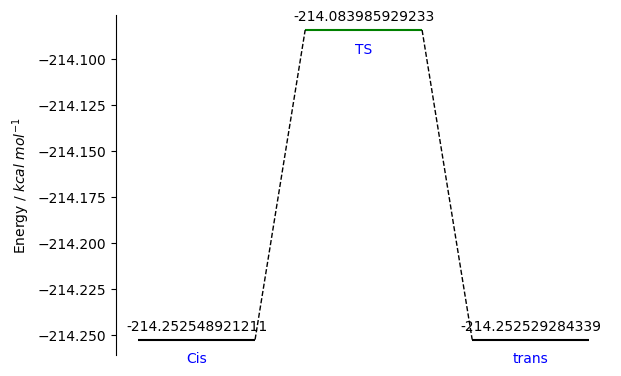

In [63]:
#Agregamos los datos para el gráfico
diagram = ED()
diagram.add_level(energia_cis,'Cis')
diagram.add_level(energia_cis_90,'TS',color='g')
diagram.add_level(energia_trans,'trans')

diagram.add_link(0,1)
diagram.add_link(1,2)
diagram.plot(ylabel="Energy / $kcal$ $mol^{-1}$") # this is the default ylabel



In [71]:
#Finalmente hacemos el cálculo de la entalpía
entalpia = energia_trans - energia_cis
print("*** CÁLCULO DE LA ENTALPIA ***")
print("\nEl valor de la entalpía generada es:",entalpia)

if entalpia > 0:
  print("\nComo la entapía es (+) la reacción es ENDOTÉRMICA")
else:
  print("\nComo la entapía es (-) la reacción es EXOTÉRMICA")

*** CÁLCULO DE LA ENTALPIA ***

El valor de la entalpía generada es: 1.9636871996908667e-05

Como la entapía es (+) la reacción es ENDOTÉRMICA


In [73]:
#También hacemos ek cálculo de la energpia de activación
energia_activacion = energia_cis_90 - energia_cis
print("*** CÁLCULO DE LA ENERGÍA DE ACTIVACIÓN ***")
print("\nEl valor de la energía de activación generada es:",energia_activacion)


*** CÁLCULO DE LA ENERGÍA DE ACTIVACIÓN ***

El valor de la energía de activación generada es: 0.16856299197800695


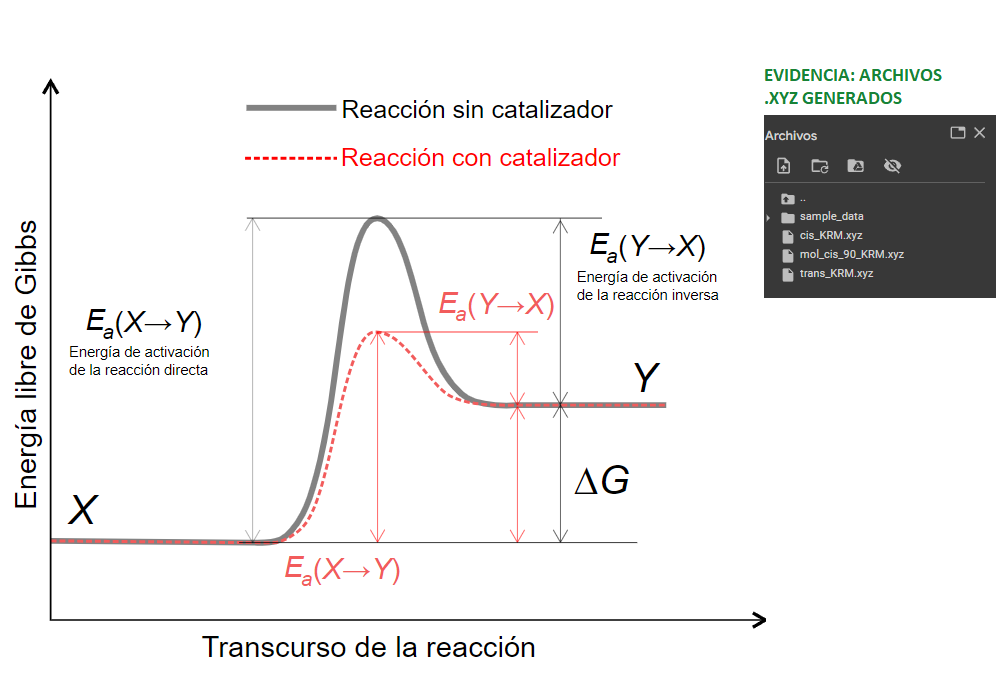